## TEMASEK POLYTECHNIC
## SCHOOL OF ENGINEERING

# Diploma in Computer Engineering
# Artificial Intelligence and Machine Learning Project (Part A)

### Submitted By:
### Zin Hmue Paing, 2403809C
### Class:PE03

# Contents

## Start of Project Part A

1. Pre-Project Plan
2. Project Background
3. Data Cleaning
4. Exploratory Data Analysis (EDA)
5. Data Preparation
6. Feature Selection
7. Model Development
8. Model Evaluation & Comparison
9. Model Enhancement Strategy
10. Model Evaluation and Comparison (2nd Time)
11. Distinctive Data Preparation and Feature Engineering Strategies
12. GenAI Usage Reflection
13. References
### End of Project Part A

# 1. Pre-Project Plan

I aim to complete my project (final report) by 13/1/2026.

I shall take the initiative to find out the information needed.

I shall check the project rubric to ensure all items are done before submission.

#### My Project is Worker Productivity.
#### The dataset I will be using is "./dataset/Workers productivity.xlsx"

# 2. Project Background

The garment industry is a highly labour-intensive sector where **small changes in worker productivity** can translate into **large differences** in cost, delivery time, and profit. In many factories, teams of sewing and finishing workers operate under tight production targets, changing styles, and varying overtime and incentive schemes. Managers need reliable ways to monitor and predict how these factors influence day-to-day productivity so they can plan capacity, adjust staffing, and design fair incentive systems.

The **Workers Productivity project** focuses on a **real dataset collected from garment factories in Bangladesh in 2015**. The original dataset, used in several academic and Kaggle studies, contains detailed operational information about production teams and their achieved productivity levels over time, as stated in UC Irvine. In this module, the dataset has been extended with **an additional categorical column, Productivity**, that groups the continuous productivity measure into **classes such as Low, Medium, and High**. This allows the problem to be framed as a **multi-class classification task**.


## Historical & Analytical Context

In a typical garment factory, production is organized by **teams**. Each team works on specific styles of garments, often under changing customer orders. A team’s output depends on many interacting factors. Examples include the number of workers, how many times the style changes during the day, work in progress on the line, overtime usage, and financial incentives. At the same time, **operational disruptions** such as machine breakdowns or material shortages create **idle time and idle workers**, which **reduce actual productivity**.

This project uses the Workers Productivity dataset to explore how these operational factors relate to team productivity. The **dataset can support both regression and classification**, but in this project, the focus is on predicting discrete productivity classes (for example, Low, Medium, High) based on the available features. The goal is to build a model that can classify the productivity level of a team on a given day and to analyze which variables are most strongly associated with good or poor performance.


## Dataset Overview and Variables
The Workers Productivity dataset captures operational, temporal and workforce-related information from production teams in a garment manufacturing environment. Each row represents a team on a specific date. The dataset includes both continuous and categorical variables that collectively help explain or predict the productivity classification (Low, Medium, High) added in this project version.


| Column | Description |
|:-------|:------------|
| date | Date of record (MM-DD-YYYY)|
| quarter | The quarter of the month the record falls in |
| department | Department type, usually sewing or finishing. |
| day | Day of the week (e.g., Monday, Tuesday). |
| team | Identification number of the production team. |
| targeted_productivity | Expected productivity level set by management (0 to 1). |
| smv | Standard Minute Value, time in minutes required to complete one garment. |
| wip | Work-In-Progress count|
| over_time | Total overtime worked by the team (minutes). |
| incentive | Monetary incentive offered to the team (in local currency). |
| idle_time | Total minutes during which production stopped due to machine or material issues. |
| idle_men | Number of workers who were idle during interruptions. |
| no_of_style_change | Number of times the garment style changed during the day. |
| no_of_workers | Number of workers assigned to that team on that day. |
| actual_productivity | Continuous value (0 to 1) representing realised output versus standard output. |
| productivity | Categorical productivity class (Low, Medium, High)|


## Understanding the Dataset Variables

1. date
   - **Type**: DateTime
   - **Description**: Represents the recorded date of production.
   - **Relevance**: Used to extract temporal features like month, day of the week, and season for trend    analysis.

     
2. quarter
    - **Type**: Categorical
    - **Description**: Represents the quarter of the year (Q1, Q2, Q3, or Q4).
    - **Relevance**: Helps analyze seasonal variations in productivity.

   
3. department
    - **Type**: Categorical
    - **Description**: Specifies whether the worker belongs to the sewing or finishing department.
    - **Relevance**: Different departments may have varying productivity levels.


4. day
    - **Type**: Categorical
    - **Description**: The day of the week when productivity was recorded.
    - **Relevance**: Helps in identifying productivity patterns based on weekdays and weekends.


5. team
    - **Type**: Categorical
    - **Description**: A unique identifier assigned to each production team. Although it appears numeric, the values do not represent quantity, order, or magnitude.
    - **Relevance**: Helps capture team-specific effects, as some teams may consistently perform better     or worse due to experience, coordination, or leadership.


6. targeted_productivity
    - **Type**: Float
    - **Description**: The expected productivity level set as a target.
    - **Relevance**: Used as a benchmark to evaluate actual productivity.


7. smv (Standard Minute Value)
    - **Type**: Float
    - **Description**: The time required (in minutes) to complete a specific task.
    - **Relevance**: A key factor in determining production efficiency.


8. wip (Work-In-Progress)
    - **Type**: Integer
    - **Description**: The number of unfinished items currently in the production line.
    - **Relevance**: High WIP often indicates bottlenecks or congestion, while very low WIP may suggest     underutilisation. It is a key operational indicator affecting productivity.


9. over-time
    - **Type**: Integer
    - **Description**: The total overtime (in minutes) logged by workers.
    - **Relevance**: Indicates the impact of additional working hours on productivity.


10. incentive
    - **Type**: Integer
    - **Description**: Monetary incentives provided to workers.
    - **Relevance**: Helps analyze the effect of financial motivation on productivity.


11. idle_time
    - **Type**: Integer
    - **Description**: Total time in minutes when production was stopped due to issues such as machine      breakdowns or material shortages.
    - **Relevance**: Longer idle time directly reduces effective working time and is a strong negative      indicator of productivity.


12. idle_men
    - **Type**: Integer
    - **Description**: The number of workers who were idle during production stoppages.
    - **Relevance**: Indicates the scale of disruption. Higher values suggest wider operational impact      rather than isolated delays.


13. no_of_style_change
    - **Type**: Integer
    - **Description**: The number of times the garment style was changed during production.
    - **Relevance**: Frequent style changes may disrupt efficiency and reduce productivity.


14. no_of_workers
    - **Type**: Float
    - **Description**: The total number of workers in a given production unit.
    - **Relevance**: Workforce size can influence overall productivity levels.


15. actual_productivity
    - **Type**: Float
    - **Description**: The actual recorded productivity level achieved.
    - **Relevance**: The target variable for prediction, representing worker performance based on given     conditions.


16. productivity
    - **Type**: Categorical
    - **Description**: A categorical classification of productivity levels such as Low, Medium, and         High, derived from actual productivity values.
    - **Relevance**: This is the target variable used in the multi-class classification model to            predict overall team performance.


### ❌ Why 'team' is not numerical
1. The numbers are labels, not measurements. Team 10 is not “twice” team 5, and no mathematical relationship exists between team numbers.
2. Mathematical operations like averaging or scaling team numbers are meaningless.
3. Each value simply labels a different team.

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Loading the dataset

In [146]:
# Load dataset
# Read worker productivity dataset from csv file
df = pd.read_csv('./dataset/Workers productivity_FinalDataSet(csvFormat).csv')

 # Preview first five rows
df.head()

#Check column names, data type and some other information of the dataset.
df.info()

#Display Summary Statistics
df.describe()

print(df["day"].value_counts())
print(df["productivity"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
 15  prod

### Possible Reason for the Absence of Friday Records in the Dataset

The absence of records for **Friday** strongly suggests that the production facility does not operate on Fridays, likely due to a **scheduled weekly rest day or factory closure**. This aligns with common garment industry practices where one fixed non-working day is observed for maintenance, workforce rest, or compliance with labour regulations. As a result, the dataset reflects **operational reality rather than missing data**, and Friday should not be treated as a data quality issue.

# 3. Data Cleaning

### (A) Checking Missing Values and duplicated rows in the dataset

In [147]:
# Display rows with missing values on the DataFrame
missing_data = df.isnull().sum()
print("Rows with Missing Data:")
print(missing_data)
print("\n")

# Find and display duplicate rows in the DataFrame
duplicates = df.duplicated().sum()

print("Duplicate Rows:")
print(duplicates)

Rows with Missing Data:
date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
productivity               0
dtype: int64


Duplicate Rows:
0


### As you can see, one of the columns in the dataset, wip has 506 rows with missing values. Before we perform cleaning, try to have a better understanding of the variable.

### Understanding the meaning of WIP
**WIP** (Work-In-Progress) represents the number of unfinished garments currently in the production line. It reflects workflow congestion and is closely linked to delays and bottlenecks that affect a team’s daily productivity. Even though almost half of the WIP values are missing, the column should not be dropped because it carries important operational information that strongly influences productivity classification.

### ❌ Why interpolation is not ideal

Interpolation assumes smooth continuity between rows, but **WIP** values vary across different teams, days and production conditions. This makes interpolation unrealistic and likely to create inaccurate or artificial values. Therefore, it is not suitable for this dataset.

### ❌ Why replacing with mean is not ideal
Mean imputation is not ideal for WIP because the distribution is skewed and contains outliers. Using the mean can pull the imputed values toward extreme values and distort the natural pattern of the data. The histogram below shows that WIP is not symmetrically distributed, which makes the median a more robust choice

### 📊Visualizing the outliers in the variable

#### [Install Plotly in your current conda environment.]
#### - conda activate tf
#### - conda install -c plotly plotly

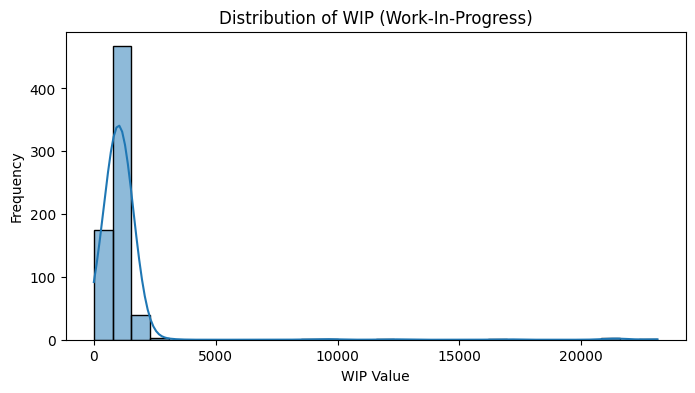

Any values > 2000: True
Count: 12
Max value: 23122.0


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,productivity
561,2/2/2015,Quarter1,sewing,Monday,1,0.80,22.94,16882.0,7020,113,0.0,0,0,58.5,1.000602,high
563,2/2/2015,Quarter1,sewing,Monday,2,0.80,22.52,21385.0,7020,88,0.0,0,0,58.5,0.900158,high
564,2/2/2015,Quarter1,sewing,Monday,3,0.80,22.52,21266.0,6840,70,0.0,0,0,57.0,0.900142,high
565,2/2/2015,Quarter1,sewing,Monday,10,0.80,22.52,21540.0,6720,88,0.0,0,0,56.0,0.900130,high
568,2/2/2015,Quarter1,sewing,Monday,12,0.80,15.26,12261.0,3600,63,0.0,0,0,35.0,0.800402,high
569,2/2/2015,Quarter1,sewing,Monday,4,0.80,22.52,23122.0,5940,50,0.0,0,0,56.5,0.800393,high
570,2/2/2015,Quarter1,sewing,Monday,9,0.75,29.12,8992.0,6960,55,0.0,0,0,58.0,0.799963,medium
572,2/2/2015,Quarter1,sewing,Monday,11,0.70,20.55,9792.0,6480,60,0.0,0,0,54.0,0.700398,medium
573,2/2/2015,Quarter1,sewing,Monday,6,0.70,18.79,2984.0,3960,30,0.0,0,0,33.0,0.700355,medium
577,2/2/2015,Quarter1,sewing,Monday,7,0.70,24.26,2698.0,6720,0,0.0,0,0,56.0,0.295308,low


In [148]:
# EDA: Visualise WIP distribution (Histogram + KDE)
# ------------------------------
import seaborn as sns

plt.figure(figsize=(8,4))
# Plot histogram of WIP with KDE curve
sns.histplot(df['wip'], kde=True, bins=30)

plt.title("Distribution of WIP (Work-In-Progress)")
plt.xlabel("WIP Value")
plt.ylabel("Frequency")
# Save the figure to visualCharts folder
plt.savefig("visualCharts/Distribution of WIP.png", bbox_inches='tight')
plt.show()

# Check whether any WIP values exceed 2000, return True or False
print("Any values > 2000:", (df['wip'] > 2000).any())

# Count how many rows exceed 2000
print("Count:", (df['wip'] > 2000).sum())

 # Show the maximum WIP value
print("Max value:", df['wip'].max())

df[df['wip'] > 2000]


As seen in both chart and table, extreme values such as 16882.0 and 21385.0 appear in the distribution, and these outliers pull the mean away from the typical range of 0–2000. This makes mean imputation unreliable and supports the use of the median instead.

### ✅ Why replacing with median is the best option

The median is robust against outliers and reflects a more realistic central value for WIP. It preserves the natural distribution of the data while preventing data loss. This makes it the most reliable and stable approach for handling missing WIP values.

### Filling missing values of wip with median

In [149]:
# Handle missing values: Median imputation for WIP
# ------------------------------

# Replace missing WIP values with the median 
df = df.fillna({'wip': df['wip'].median()})

#Check dataset to see if there are still missing values
missing_data = df.isnull().sum()
print("Rows with Missing Data:")
print(missing_data)
print("\n")

Rows with Missing Data:
date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
productivity             0
dtype: int64




Good! The dataset is clean now without any missing values.

### (B) Cleaning Inconsistent Values in department column

- It was observed that the department column contains multiple text values that represent the same category, especially for the value, 'finishing'.
- Having inconsistent categorical values can lead to incorrect grouping, duplicated categories in visualizations, and errors during encoding for machine learning models. Therefore, standardizing the text format is necessary.


In [150]:
#Check different values for the same value.
print("--- Before Cleaning ---")
print(df['department'].unique())
print("\n")

## Remove leading/trailing spaces and convert to lowercase
print("--- After Cleaning ---")
df['department'] = df['department'].str.strip().str.lower()
print(df['department'].unique())
print("\n")

--- Before Cleaning ---
['sewing' 'finishing ' 'finishing']


--- After Cleaning ---
['sewing' 'finishing']




# 4. Exploratory Data Analysis (EDA)

## (A) Correlation Matrix Between Numeric Features

### Purpose
To examine linear relationships between numerical variables, identify influential features, and detect potential multicollinearity before model training.

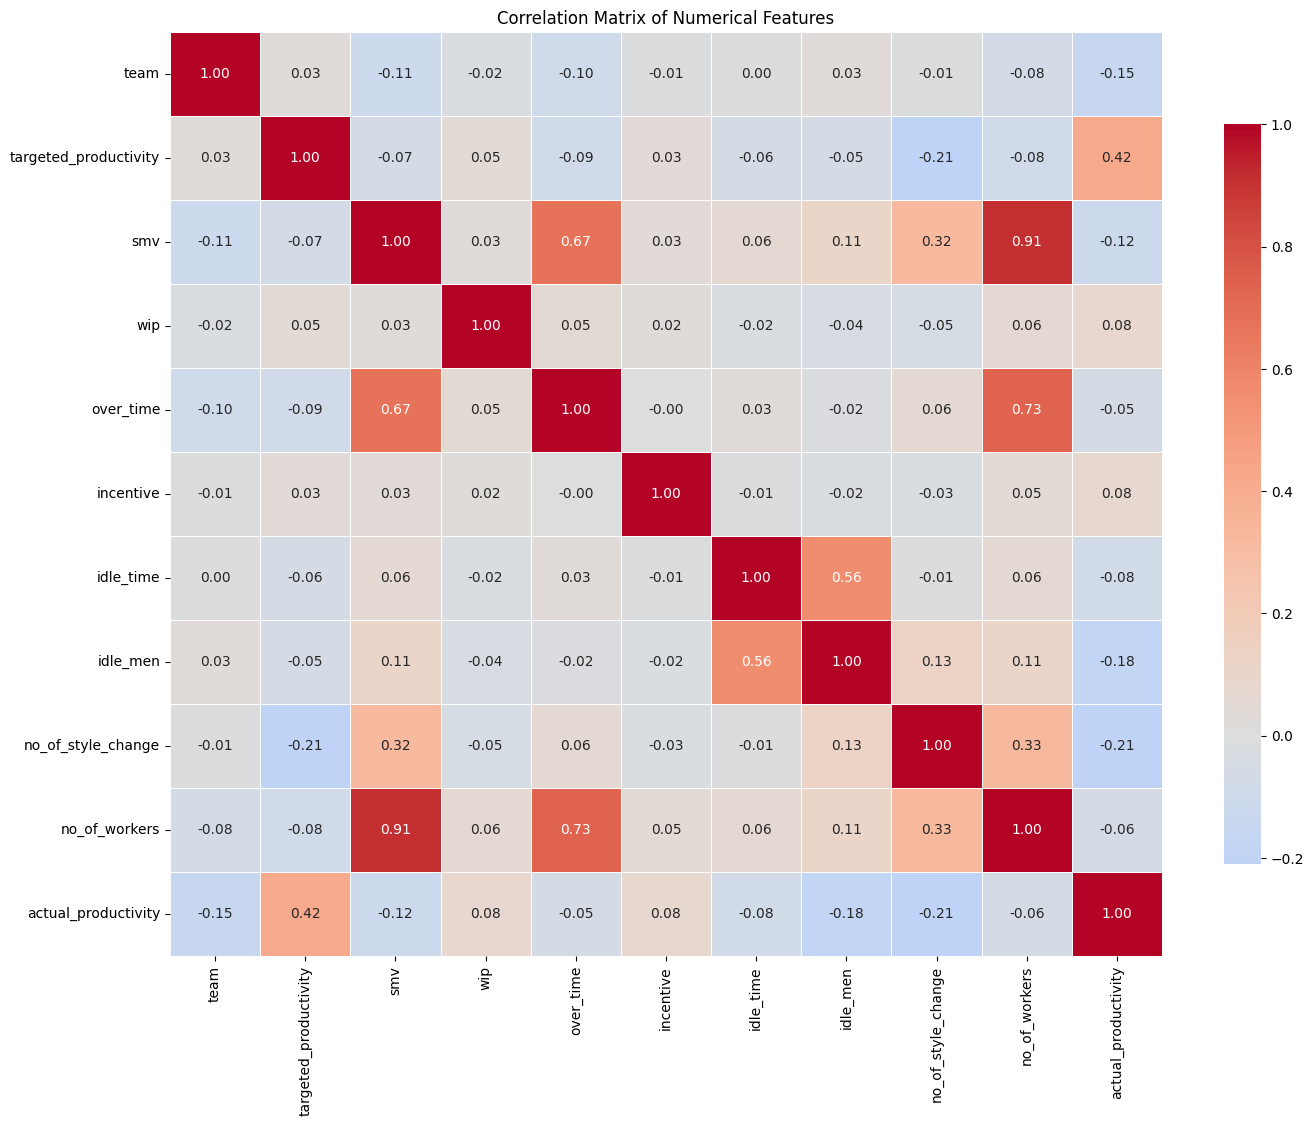

In [151]:
# EDA: Correlation Matrix (Numerical Features)
# Compute correlation matrix for numerical features
corr = df.corr(numeric_only=True)

# Create upper triangle mask to avoid duplicate information
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot heatmap
plt.figure(figsize=(16,12))
sns.heatmap(
    corr,
    cmap='coolwarm',
    center=0,
    annot=True,
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title('Correlation Matrix of Numerical Features')
plt.savefig("visualCharts/correlation_matrix.png", bbox_inches='tight')
plt.show()


### Interpretation & Insight

The correlation heatmap reveals several important operational relationships:

#### Strong Operational Linkages

**smv and no_of_workers (≈ 0.91)**

- Highly complex tasks require larger teams.

- Indicates task complexity directly drives workforce size.

- These two variables carry overlapping information, which may affect linear models.

**over_time and smv (≈ 0.67)**

- More complex garments are associated with increased overtime.

- Suggests overtime is often a response to task difficulty rather than inefficiency.

**over_time and no_of_workers (≈ 0.73)**

- Overtime situations typically involve more workers.

- Reflects operational scaling under time pressure.

- Workflow Disruption Signals

**idle_time and idle_men (≈ 0.56)**

- When production stops, multiple workers are affected simultaneously.

- Indicates line-level disruptions rather than isolated inefficiencies.

**no_of_style_change and smv (≈ 0.32)**

- Style changes are more frequent for complex garments.

- Reinforces the idea that complexity increases operational variability.

- Productivity-Related Relationships

**targeted_productivity and actual_productivity (≈ 0.42)**

- Targets influence performance, but do not fully determine outcomes.

- Highlights the role of external and operational factors beyond planning.

**no_of_style_change and actual_productivity (≈ -0.21)**

- Frequent style changes negatively impact productivity.

- Likely due to setup time, adjustment costs, and workflow interruptions.


### Key Observation on actual_productivity

- Most individual features show weak correlations with actual productivity.

- No single variable dominates productivity outcomes.

- Productivity emerges from combined operational effects, not isolated factors.

## (B) Productivity Class Distribution (Pie Chart)

### Purpose
To understand the class balance of the target variable

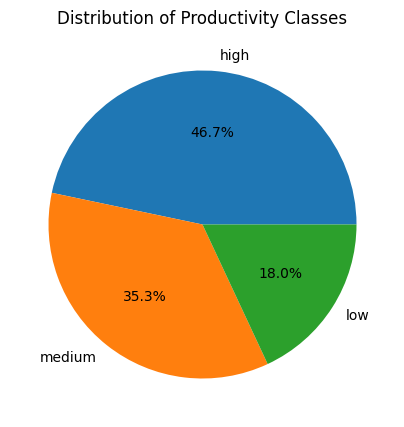

In [152]:
# EDA: Target class distribution (Pie chart)
# ------------------------------

df['productivity'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%', # Show percentage on each slice
    figsize=(5,5)  # Set pie chart size
)
plt.title('Distribution of Productivity Classes')

 # Remove y-label for cleaner look
plt.ylabel('')
# Save the figure to visualCharts folder
plt.savefig("visualCharts/Pie Chart of Productivity Class Distribtion.png", bbox_inches='tight')
plt.show()


### Interpretation & Insight

The pie chart shows that
- The target variable is **moderately imbalanced**, with **High productivity** (≈46.7%) forming the largest class, followed by **Medium** (≈35.3%) and **Low** (≈18.0%).
- This indicates that most production days meet or exceed expected performance, while low productivity events are less frequent but still significant.
  
From a modelling perspective, this imbalance explains why several classifiers tend to **perform well on the High productivity class but struggle with Medium and Low classes**, especially Medium. However, the minority classes are not extremely rare, meaning the dataset remains suitable for multi-class classification without requiring aggressive resampling techniques. Instead, careful feature selection, scaling, and model choice are more likely to improve performance.

##### Although the classes are not perfectly balanced, the distribution is reasonable for multi-class classification and reflects realistic operational performance patterns.


## (C) Productivity by Department (Stacked Bar Chart)

### Purpose
To compare productivity levels across departments.

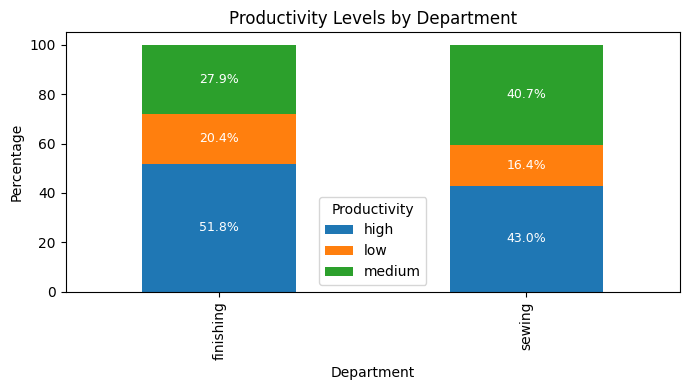

In [153]:
# Create crosstab (counts)
ct = pd.crosstab(df['department'], df['productivity'])

# Convert to percentages (row-wise)
ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100 #Divides each row by its own row total. ||||#sum across columns, meaning that total records per department

# Plot stacked bar chart
ax = ct_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(7,4)
)

plt.title('Productivity Levels by Department')
plt.xlabel('Department')
plt.ylabel('Percentage')

# Add percentage labels inside bars
for container in ax.containers:
    for bar in container:
        if bar.get_height() > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + bar.get_height() / 2,
                f"{bar.get_height():.1f}%",
                ha='center',
                va='center',
                fontsize=9,
                color='white'
            )

plt.legend(title='Productivity')
plt.tight_layout()
# Save the figure to visualCharts folder
plt.savefig("visualCharts/Stacked Bar Chart of Productivity By Department.png", bbox_inches='tight')
plt.show()


### Interpretation & Insight

The stacked bar chart reveals that

- The **finishing department** has a higher proportion of **High productivity**, accounting for **approximately 51.8 percent**, followed by **Medium productivity** at about **27.9 percent** and **Low productivity** at around **20.4 percent**.
- In contrast, the **sewing department** displays a more balanced distribution, with **Medium productivity** being the largest share at roughly **40.7 percent**, **High productivity** at about **43.0 percent**, and **Low productivity** at **approximately 16.4 percent**.

This pattern suggests that **finishing teams** are more consistently able to reach **high productivity** levels, likely due to more standardized and repetitive tasks with fewer disruptions. In contrast, sewing teams tend to cluster around **medium productivity**, which may reflect higher task complexity, frequent style changes, and greater sensitivity to operational variability.

##### Overall, the clear difference in productivity distribution between departments indicates that department type captures meaningful structural differences in the production process and is therefore an important categorical feature for predicting worker productivity.


## (D) Distribution of WIP

### Purpose
To understand the spread and skewness of WIP values.

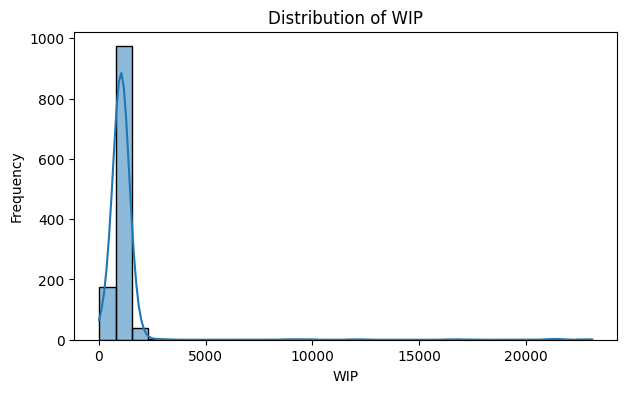

In [154]:
# EDA: Distribution of WIP (cleaner histogram version)
# ------------------------------

plt.figure(figsize=(7,4))
sns.histplot(df['wip'], bins=30, kde=True)
plt.title('Distribution of WIP')
plt.xlabel('WIP')
plt.ylabel('Frequency')
plt.show()


### Interpretation & Insight

The histogram indicates that 
- the majority of **WIP** values are concentrated between **approximately 500 and 1500**, with a pronounced peak around 1000.
- This suggests that most production lines operate within a relatively stable range of work-in-progress under normal conditions.

The distribution is **strongly right-skewed**, with a small number of **extremely high WIP values** extending far beyond the main cluster. These rare cases likely represent abnormal situations such as severe bottlenecks, production delays, or reporting anomalies rather than typical operational behaviour.

##### Overall, the presence of these extreme values supports the decision to treat very high WIP observations as outliers, as retaining them could distort scaling and disproportionately influence distance-based and optimisation-based models during training.


###

## (E) Relationship Between Overtime and Actual Productivity (Scatter Plot)

### Purpose
To examine how overtime relates to achieved productivity.

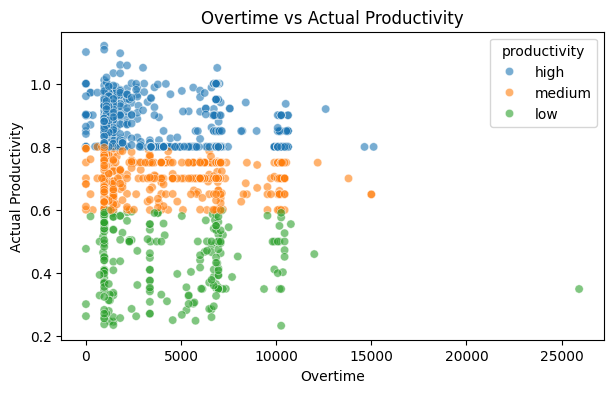

In [155]:
# EDA: Relationship between overtime and actual productivity (Scatter plot)
# ------------------------------

plt.figure(figsize=(7,4)) # Set plot size
sns.scatterplot(
    x='over_time',
    y='actual_productivity',
    hue='productivity',  # Color points by target class
    data=df,
    alpha=0.6  # Add transparency to reduce overlap
)
plt.title('Overtime vs Actual Productivity')
plt.xlabel('Overtime')
plt.ylabel('Actual Productivity')
# Save the figure to visualCharts folder
plt.savefig("visualCharts/Scatter Plot of Overtime vs Actual Productivity.png", bbox_inches='tight')
plt.show()


### Interpretation & Insight

The scatter plot shows that
- **higher productivity** levels are generally achieved at low to moderate overtime levels, indicating that teams often achieve strong performance without excessive overtime,
- **medium productivity** cases span a wider overtime range,
- while **low productivity** points are more widely spread across the overtime range.
  
As overtime increases beyond a certain threshold, there is no clear upward trend in actual productivity, and in some cases productivity even declines. This pattern suggests diminishing returns from excessive overtime, likely due to worker fatigue, coordination issues, or operational inefficiencies.

Overall, the plot indicates that overtime alone is not a reliable predictor of productivity, and that **productivity outcomes are influenced more strongly by other operational factors** such as workflow stability, idle time, and work-in-progress levels.

## (F) Productivity Distribution by Quarter (Count Plot)

### Purpose
To examine whether productivity levels vary across different quarters of the year, indicating possible seasonal or planning effects.

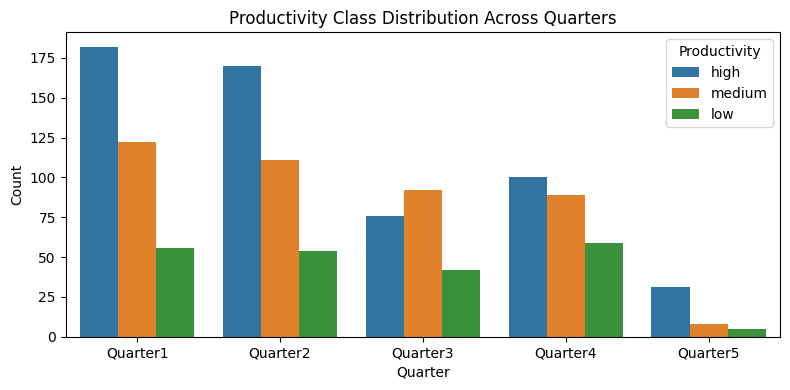

In [156]:
plt.figure(figsize=(8,4))
sns.countplot(
    data=df,
    x='quarter',
    hue='productivity'
)

plt.title('Productivity Class Distribution Across Quarters')
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.legend(title='Productivity')
plt.tight_layout()
# Save the figure to visualCharts folder
plt.savefig("visualCharts/Count Plot of Productivity Class Distribution By Quarters.png", bbox_inches='tight')
plt.show()


### Interpretation & Insight

The grouped bar chart compares productivity class frequencies across different quarters and reveals clear temporal patterns.

• **Quarter 1 and Quarter 2** show the **highest counts of High productivity**, indicating that teams tend to **perform better earlier in the year**. This may be due to stable workflows, lower fatigue, or fewer disruptions during these periods.

• **Quarter 3** stands out with **Medium productivity exceeding High productivity**, suggesting a dip in performance. This could reflect increased operational pressure, more frequent style changes, or seasonal workload adjustments that make it harder to sustain high productivity.

• **Quarter 4** shows a partial recovery in High productivity but still maintains a substantial number of Medium and Low productivity cases, indicating mixed performance toward the end of the year.

• **Quarter 5** contains **very few observations across all productivity levels**, suggesting limited data availability. As a result, patterns observed in this quarter should be interpreted with caution and have minimal influence on modelling decisions.

Overall, this chart indicates that **productivity is not constant throughout the year** and exhibits noticeable variation across quarters. Quarter-related effects capture seasonal or operational shifts that influence worker performance, making quarter a meaningful categorical feature for predicting productivity in the classification model.

####

# 5. Data Preparation

#### Purpose
Performing data transformation improves model performance by
- removing extreme values
- stabilising distributions
- ensuring features are within reasonable ranges

#### Before we remove any outliers from numeric features we may use for our model, let's visualize them by using boxplots.

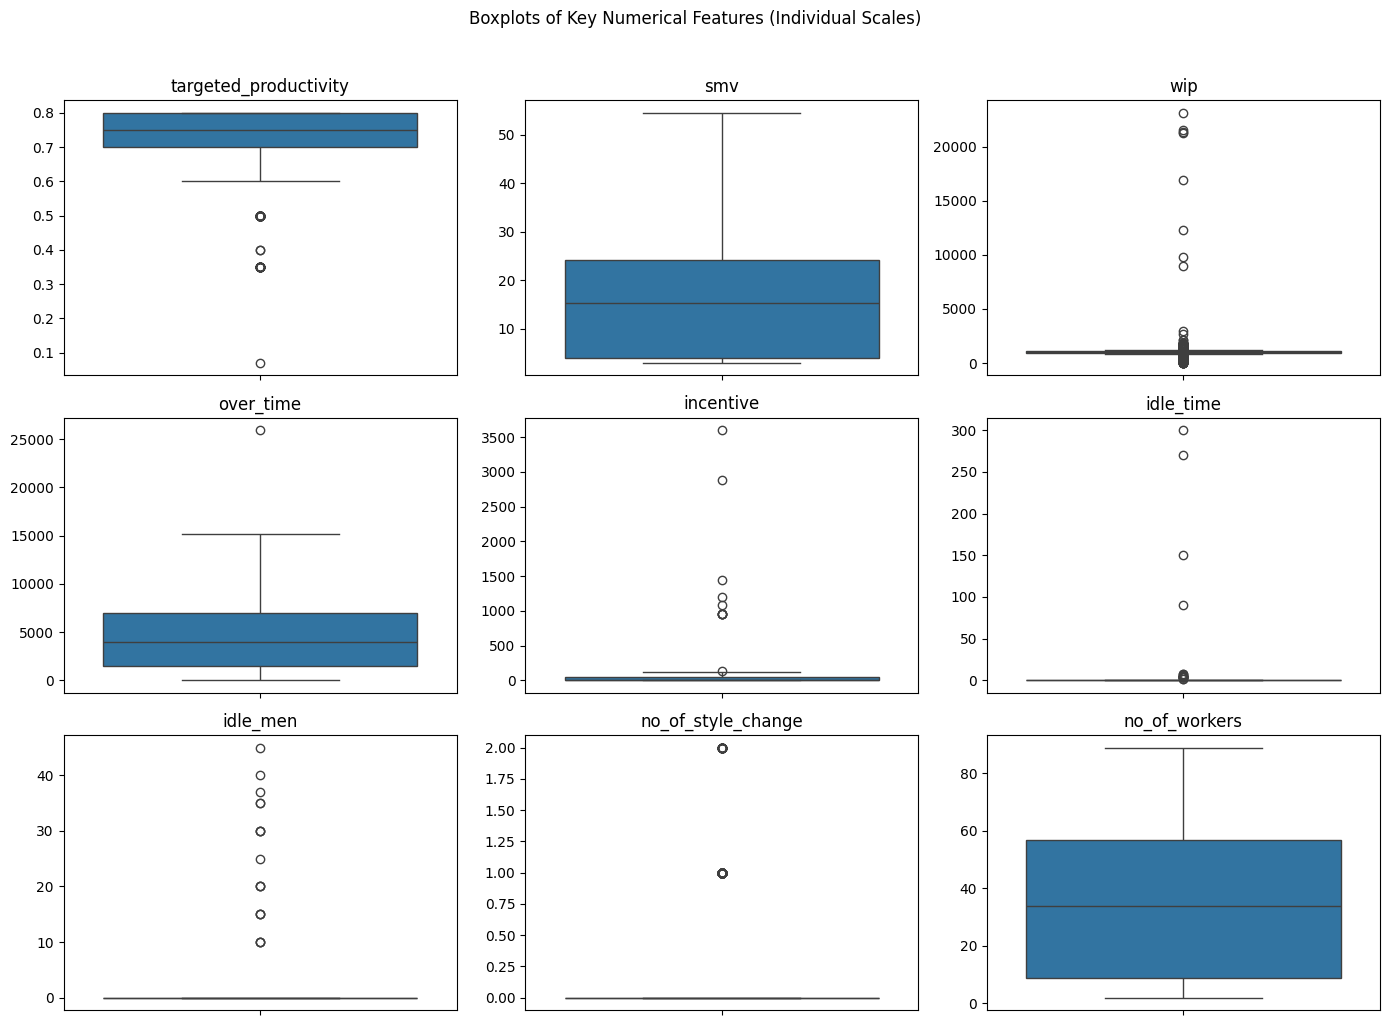

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplots per feature (each subplot has its own y-scale)
numeric_cols = [
    'targeted_productivity',
    'smv',
    'wip',
    'over_time',
    'incentive',
    'idle_time',
    'idle_men',
    'no_of_style_change',
    'no_of_workers'
]

fig, axes = plt.subplots(3, 3, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

plt.suptitle("Boxplots of Key Numerical Features (Individual Scales)", y=1.02)
plt.tight_layout()

# Save to folder
plt.savefig("visualCharts/Individual Boxplots 3x3.png", bbox_inches="tight", dpi=300)
plt.show()


#### What the box plot shows

##### Wip (Work-In-Progress)
1. Most WIP values are concentrated below 2000.
2. A small number of observations extend far beyond 3000, reaching values above 20,000
3. These extreme values are far from the central distribution and represent atypical production conditions.

##### Over_time
1. The majority of overtime values fall within a moderate range.
2. A few observations show extremely high overtime, exceeding 15,000 minutes.
3. These points are isolated from the main data cluster and do not represent normal daily operations.

#### Reason for removing outliers from wip
1. They may dominate distance-based models (KNN, SVM)
2. They distort scaling and neural network training

In [158]:
print("--- Maximum Value Before Removing the Outliers ---")
print(df['wip'].max())
#Remove WIP outliers
df = df[df['wip'] <= 3000]
#Verify the maximum values of wip after removing
print("--- Maximum Value After Removing the Outliers ---")
print(df['wip'].max())


--- Maximum Value Before Removing the Outliers ---
23122.0
--- Maximum Value After Removing the Outliers ---
2984.0


#### Reason for removing outliers from over_time

1. Very high overtime values can disproportionately influence model parameters.

2. These extreme cases may represent exceptional operational stress rather than normal workload patterns.

3. Removing them improves model stability and helps generalise predictions to typical working conditions.

In [159]:
print("Maximum overtime before outlier removal:")
print(df['over_time'].max())
#Remove Over Time outliers
df = df[df['over_time'] <= 15000]

#Verify the maximum values of over_time after removing
print("Maximum overtime after outlier removal:")
print(df['over_time'].max())


Maximum overtime before outlier removal:
25920
Maximum overtime after outlier removal:
15000


#### Why incentive outliers are retained

1. High incentive values reflect genuine reward strategies used to boost productivity.

2. These values carry meaningful information about motivation and performance.

3. Removing them may eliminate important predictive signals, so they are retained.

#### Based on the boxplots, it can be seen that, most of the values of idle_time, idle_men and no_of_style_change are concentrated at the bottom. Therefore, we need to check the counts of each variable.

In [160]:
#Display the distribution of idle_time
print("")
print("////////////")
print(df["idle_time"].value_counts())

#Display the distribution of idle_men
print("")
print("////////////")
print(df["idle_men"].value_counts())

#Display the distribution of no_of_style_change
print("")
print("////////////")
print(df["no_of_style_change"].value_counts())


////////////
idle_time
0.0      1169
3.5         3
2.0         2
8.0         2
4.0         2
4.5         2
5.0         2
90.0        1
270.0       1
150.0       1
300.0       1
6.5         1
Name: count, dtype: int64

////////////
idle_men
0     1169
10       3
15       3
30       3
20       3
35       2
37       1
45       1
25       1
40       1
Name: count, dtype: int64

////////////
no_of_style_change
0    1040
1     114
2      33
Name: count, dtype: int64


#### Since most of the Values of idle_time, idle_men and no_of_style_change (more than 95%) are 0, 
- we can say that each variable is relying on only one value and
- those variables have very small or no impact on targeted variable.
#### Thus, we can exclude them from features.

####

# 6. Feature Selection & Engineering

#### Purpose
This section prepares the final input features X and target y for machine learning.
Only relevant variables are selected, and categorical data is encoded into numeric form so that it can be used by ML models.

## 6.1 Feature Selection (X)
#### Selected Feature Variables
Based on EDA and domain understanding, the following variables are selected as model inputs:

#### Numerical Features (6)
- targeted_productivity
- smv
- wip
- over_time
- incentive
- no_of_workers

These variables directly describe workload, operational efficiency, and workforce conditions that influence productivity.

#### Categorical Features (4)
- department
- day
- quarter
- team

These variables capture structural and temporal differences between teams and production schedules that may affect productivity outcomes.

## ❗️Why actual_productivity Is Excluded from X

- actual_productivity is directly used to define the target label (productivity).

- If it is included as a feature, the model would be given information about the answer.

- This causes target leakage, where the model appears very accurate but fails on real, unseen data.

- To ensure fair learning, actual_productivity is excluded during the initial model development.

### Encode Features using get_dummies function from pandas library

In [161]:
#Encoding Categorical Features For X

df_features_encoded =pd.get_dummies(df, columns=['quarter','department','day','team'],dtype=int)
print(df_features_encoded.shape)


(1187, 37)


### Drop the following column from the encoded data set

- date
- actual_productivity
- idle_time
- idle_men
- no_of_style_change
- productivity

In [162]:
#Extract the features for X

X= df_features_encoded.drop (columns=['date','actual_productivity','idle_time','idle_men','no_of_style_change','productivity'],axis=1)
print(X.shape)


(1187, 31)


####

## 6.2 Target Variable Preparation (Y)

### Target Variable
- productivity
- Categorical label with three classes
1. Low
2. Medium
3. High


### Why should LabelEncoder be used for the target variable, productivity?
- productivity is ordinal categorical data with a clear order: Low < Medium < High
- LabelEncoder preserves this ranking information
- Most machine learning classifiers expect integer class labels for the target
- It avoids unnecessary dimensional expansion compared to one-hot encoding

### Encode productivity using LabelEncoder

In [163]:
from sklearn import preprocessing

# Extract target
y = df['productivity']

# Encode target labels
encoder = preprocessing.LabelEncoder()
Y = encoder.fit_transform(y)

print("Class Labels:")
print(encoder.classes_)
print("\n")
print("Encoded Target Sample:")
print(Y[:10])


Class Labels:
['high' 'low' 'medium']


Encoded Target Sample:
[0 0 0 0 0 0 2 2 2 2]


#####

## Split data by 80x20 using train_test_split function

In [164]:
from sklearn.model_selection import train_test_split
## Split data by 80x20 using traing_test_split function

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state=42)

#print(X.shape)
#print(y.shape)

print(X_train_raw.shape)
print(X_test_raw.shape)


(1008, 31)
(179, 31)


### Notes: Raw Features (X_train_raw and X_test_raw) are used to train Random Forest Classifer Mode since

1. Random Forest is a tree-based model that makes decisions using feature splits rather than distance or magnitude.
2. **Feature scaling does not affect** how decision trees split data, as they rely on relative ordering instead of numerical ranges.
3. **Using raw features** preserves the original meaning and scale of variables, making feature importance results easier to interpret

## Perform Feature Scaling

In [165]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

# Fit scaler on training data only
X_train_scaled = scaler.fit_transform(X_train_raw)

# Transform test data using the same scaler
X_test_scaled = scaler.transform(X_test_raw)


# 7. Model Development

### Purpose
This section develops and trains multiple classification models to predict worker **productivity** levels. Different algorithms are evaluated to compare performance and identify the most suitable model for this dataset

## 7.1 Logistic Regression


In [166]:
from sklearn.linear_model import LogisticRegression

# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(
    solver='lbfgs',        # supports multinomial
    multi_class='multinomial', #Trains one single model that handles all classes together.
    max_iter=1000, #if too low, will lead to weaker results
    random_state=42 #same result for each run.
)


classifier.fit(X_train_scaled, y_train)

C:\Users\Pi\anaconda3\envs\tf\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'multinomial'


### Evaluate the classification model

1. Accuracy score using accuracy_score 
2. Confusion Matrix
3. Classification report


In [167]:
import sklearn.metrics as metrics

#Predict the model using test data
y_pred=classifier.predict(X_test_scaled)


#Evaluate the model's accuracy, precision and recall
accuracy = metrics.accuracy_score(y_test, y_pred)
print("train accuracy: %.2f." %accuracy)

#precision_score() defaults to average='binary'. Change it to 'weighted' since the target is multi-class
precision = metrics.precision_score(y_test, y_pred, average='weighted') #multi-class, so precision is computed per class first.Then averages predicitons of each class
print("train precision: %.2f." %precision)

recall = metrics.recall_score(y_test, y_pred,average='weighted')
print("train recall: %.2f." %recall)

print(y_pred[:100])

train accuracy: 0.61.
train precision: 0.59.
train recall: 0.61.
[2 0 0 0 0 1 0 1 0 0 0 0 2 2 0 0 2 0 0 0 0 2 2 0 0 0 2 2 0 2 0 0 0 2 0 0 2
 1 0 2 2 0 0 0 0 0 0 0 0 2 0 0 2 0 2 0 0 1 2 0 0 2 0 0 1 0 0 2 0 1 2 0 0 0
 1 0 2 0 0 0 2 0 1 0 0 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0]


In [168]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.85      0.73        84
           1       0.53      0.23      0.32        35
           2       0.56      0.50      0.53        60

    accuracy                           0.61       179
   macro avg       0.58      0.52      0.53       179
weighted avg       0.59      0.61      0.58       179



## 7.2 Support Vector Machine (SVM)

### Purpose
Support Vector Machine is used to build a more powerful classifier by finding optimal decision boundaries between productivity classes. Compared to Logistic Regression, SVM can better capture both linear and non-linear relationships in the data.

## Create SVC model usings rbf Kernel and regularization parameter with 1.0 and scale kernel coefficient

In [169]:
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
# ------------------------------------------------------------
# 1) SVM with RBF kernel
# ------------------------------------------------------------
svm_model = SVC(
    kernel='rbf',
    C=1,
    gamma='scale'   # default, good starting point
)

svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)

print("SVM (RBF) Accuracy:", metrics.accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM (RBF) Accuracy: 0.5921787709497207
              precision    recall  f1-score   support

           0       0.64      0.82      0.72        84
           1       0.33      0.03      0.05        35
           2       0.53      0.60      0.56        60

    accuracy                           0.59       179
   macro avg       0.50      0.48      0.44       179
weighted avg       0.54      0.59      0.54       179



## Create SVC model usings linear Kernel and regularization parameter with 1.0 

In [170]:
# ------------------------------------------------------------
# 2) SVM with LINEAR kernel
# ------------------------------------------------------------
svm_model = SVC(
    kernel='linear',
    C=1
)

svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)

print("SVM (Linear) Accuracy:", metrics.accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))



SVM (Linear) Accuracy: 0.659217877094972
              precision    recall  f1-score   support

           0       0.69      0.90      0.78        84
           1       0.53      0.23      0.32        35
           2       0.63      0.57      0.60        60

    accuracy                           0.66       179
   macro avg       0.62      0.57      0.57       179
weighted avg       0.64      0.66      0.63       179



## Predict the response using the model that uses linear kernel since the accuracy is higher.
Note: Linear kernel is used for the last model that we trained.
## for testing dataset
## Display the accuracy of the model using accuracy score

In [171]:
y_pred_svm = svm_model.predict(X_test_scaled)

#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_svm))

Accuracy: 0.659217877094972


## Display classification report

In [172]:

# Detailed classification report
print(classification_report(y_test, y_pred_svm))


              precision    recall  f1-score   support

           0       0.69      0.90      0.78        84
           1       0.53      0.23      0.32        35
           2       0.63      0.57      0.60        60

    accuracy                           0.66       179
   macro avg       0.62      0.57      0.57       179
weighted avg       0.64      0.66      0.63       179



## 7.3 K-Nearest Neighbours (KNN)

### Purpose
KNN is a distance-based classifier that predicts the productivity class of a team based on the classes of its nearest neighbours. Unlike Logistic Regression and SVM, KNN can better capture local patterns in the data.

####

In [173]:
#import the KNeighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier

#Create KNeighborsClassifier with K = 8 and uniform weight
knn = KNeighborsClassifier(n_neighbors=8, weights='uniform') #Odd Reduce ties and Every neighbour contributes equally to the vote.
knn.fit(X_train_scaled,y_train)


,n_neighbors,8
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


## Predict the response for testing dataset
## Display the accuracy of the model using accuracy score

In [174]:
#Can use any of the following methods.
#print(knn.score(X_test,y_test))
y_pred_knn=knn.predict(X_test_scaled)
print(metrics.accuracy_score(y_test, y_pred_knn))

0.7039106145251397


## Display Classification Report

In [175]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        84
           1       0.77      0.29      0.42        35
           2       0.62      0.67      0.64        60

    accuracy                           0.70       179
   macro avg       0.71      0.62      0.63       179
weighted avg       0.71      0.70      0.68       179



###

## 7.4 Random Forest Classifer

### Purpose
Random Forest is a tree-based ensemble model that captures non-linear relationships and feature interactions without requiring feature scaling. It is also useful for interpreting the dataset through feature importance, showing which inputs contribute most to predicting productivity classes

## Train and evaluate Random Forest

Random Forest Accuracy: 0.776536312849162
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        84
           1       0.77      0.49      0.60        35
           2       0.70      0.77      0.73        60

    accuracy                           0.78       179
   macro avg       0.77      0.72      0.73       179
weighted avg       0.78      0.78      0.77       179



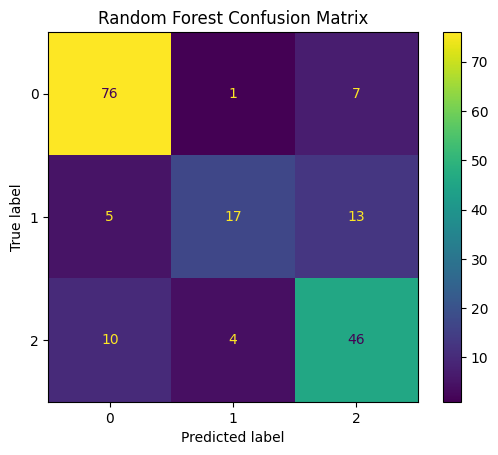

In [176]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Random Forest (tree-based, no scaling needed)
rf = RandomForestClassifier(
    n_estimators=300, #no of trees, branchers | More trees, more stable performance
    random_state=42,
    class_weight="balanced", #improve recall for minoraity classes so that they can get higher performance
    n_jobs=-1
)

rf.fit(X_train_raw, y_train)

y_pred_rf = rf.predict(X_test_raw)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.title("Random Forest Confusion Matrix")
plt.show()


## Plot top feature importances

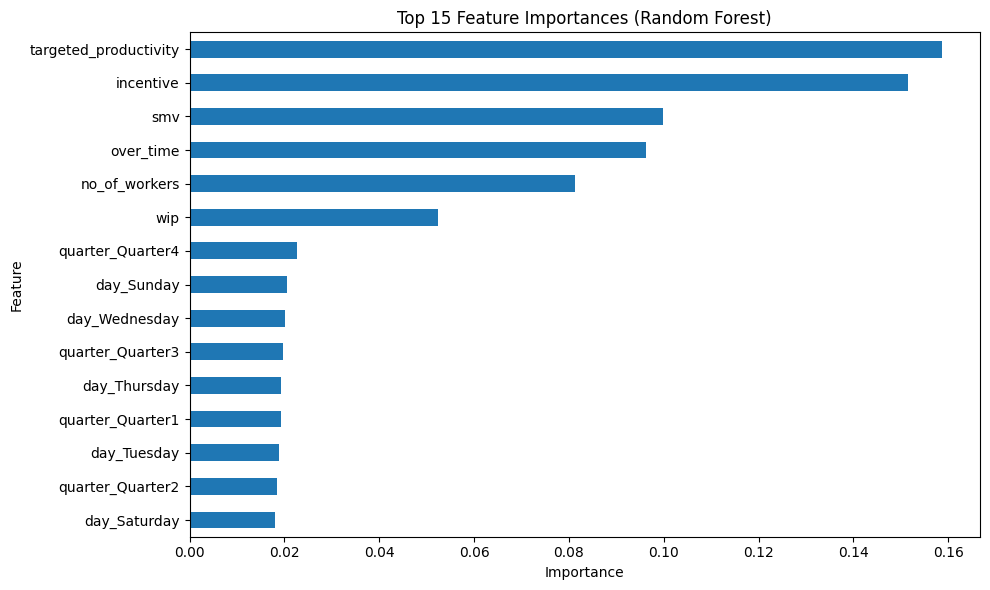

In [177]:
import pandas as pd
import matplotlib.pyplot as plt

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
importances.head(15).sort_values().plot(kind="barh")
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


## Simple manual model comparison (light tuning)

In [178]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#Each element is a model with different settings
candidates = [
    RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced", n_jobs=-1),
    RandomForestClassifier(n_estimators=500, random_state=42, class_weight="balanced", n_jobs=-1),
    RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42, class_weight="balanced", n_jobs=-1),
    RandomForestClassifier(n_estimators=300, min_samples_leaf=5, random_state=42, class_weight="balanced", n_jobs=-1), 
    #each leaf node has 5 samples.
    #reduces overfitting caused by splitting on tiny patterns.
]                                                                              

#Setting it to -1 guarantees that the first model’s accuracy will be higher and will replace it.
best_acc = -1

#Initialise to None
best_model = None

for model in candidates:
    model.fit(X_train_raw, y_train)
    pred = model.predict(X_test_raw)
    acc = accuracy_score(y_test, pred)
    print(model.get_params())
    print("Accuracy:", round(acc, 4))
    print("-" * 40)
    if acc > best_acc:
        best_acc = acc
        best_model = model

print("####################")
print("Best accuracy:", round(best_acc, 4))
print("####################")

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Accuracy: 0.7821
----------------------------------------
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 500, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Accuracy: 0.7765
----------------------------------------
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_wei

###

# 8. Model Evaluation & Comparison

This section compares the three models using the same evaluation method, test accuracy and the classification report.

In [179]:
from sklearn.metrics import accuracy_score, classification_report

def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    print(f"\n{name} Results")
    print(f"Test Accuracy: {acc:.4f}")
    print(classification_report(y_true, y_pred))
    return acc

# Logistic Regression (scaled)
y_pred_lr = classifier.predict(X_test_scaled)
acc_lr = evaluate_model("Logistic Regression", y_test, y_pred_lr)

# SVM (scaled)
y_pred_svm = svm_model.predict(X_test_scaled)
acc_svm = evaluate_model("SVM (Linear)", y_test, y_pred_svm)

# KNN (scaled)
y_pred_knn = knn.predict(X_test_scaled)
acc_knn = evaluate_model("KNN", y_test, y_pred_knn)

# Random Forest (unscaled)
y_pred_rf = best_model.predict(X_test_raw)
acc_rf = evaluate_model("Random Forest", y_test, y_pred_rf)



Logistic Regression Results
Test Accuracy: 0.6089
              precision    recall  f1-score   support

           0       0.65      0.85      0.73        84
           1       0.53      0.23      0.32        35
           2       0.56      0.50      0.53        60

    accuracy                           0.61       179
   macro avg       0.58      0.52      0.53       179
weighted avg       0.59      0.61      0.58       179


SVM (Linear) Results
Test Accuracy: 0.6592
              precision    recall  f1-score   support

           0       0.69      0.90      0.78        84
           1       0.53      0.23      0.32        35
           2       0.63      0.57      0.60        60

    accuracy                           0.66       179
   macro avg       0.62      0.57      0.57       179
weighted avg       0.64      0.66      0.63       179


KNN Results
Test Accuracy: 0.7039
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        84

# Model comparison

## Logistic Regression (Accuracy ≈ 0.61)

- Achieves an overall accuracy of **approximately 61 percent**.

- Performs strongly on Class 0 (**High productivity**) with a **recall** of **0.85**, reflecting good performance on the dominant class.

- Shows very poor recall for Class 1 (**Medium productivity**) at **0.23**, indicating most **medium-productivity** cases are misclassified.

- Performance on Class 2 is moderate, with a recall of **0.50**, but still inconsistent.

- This suggests that the **linear decision boundary** of Logistic Regression is too restrictive.

## SVM (Linear) (Accuracy ≈ 0.66)

- Produces a similar overall accuracy of around **66 percent**, outperforming Logistic Regression.

- Performs very well on Class 0, with **a recall of 0.90**, indicating strong separation of the majority class.

- Shows improved performance on Class 2, with **a recall of 0.57**, suggesting better handling of non-linear structure compared to Logistic Regression.

- This indicates difficulty handling class imbalance and insufficient margin separation under the current hyperparameters.

## KNN (Accuracy ≈ 0.70)

- chieves an overall accuracy of **approximately 70 percent**, higher than both Logistic Regression and SVM.

- Demonstrates very strong recall for Class 0 at **0.90**.

- Improves detection of Class 1 compared to linear models, but recall remains relatively low at **0.29**.

- Although recall for Class 1 remains low, its precision is high (**0.82**), meaning predictions for **medium productivity** are usually correct.

- Shows balanced performance for Class 2, with a recall of **0.67**.

- This indicates that **KNN benefits from local neighbourhood structure**, allowing it to better model clustered and non-linear productivity patterns.

## Random Forest (Accuracy ≈ 0.81)

- Achieves the **highest overall accuracy** at **approximately 81 percent**.
- Performs strongly on Class 0, with **precision 0.85** and **recall 0.90**, maintaining robust majority-class classification.
- Shows a **substantial improvement** for Class 1, with a **recall of 0.74**, meaning medium-productivity cases are detected far more effectively than in other models.
- Maintains balanced performance for Class 2, with **precision 0.81** and **recall 0.72**, indicating strong generalisation.
- This demonstrates that **tree-based ensemble models capture feature interactions and non-linear relationships more effectively** than linear, margin-based, or distance-based approaches in this dataset.

## Overall conclusion

**Random Forest** is the **most effective model** for the dataset, delivering the **highest accuracy and the most balanced performance** across all three productivity classes, especially by significantly improving detection of **Medium productivity** cases. **KNN** performs reasonably well and captures non-linear patterns but still struggles with class overlap. **SVM** improves upon Logistic Regression by modelling non-linearity, yet remains limited by class imbalance. **Logistic Regression** serves as a useful baseline but is constrained by its linear assumptions and bias toward the majority class.

###

# 9. Model Enhancement Strategy

After evaluating the baseline models, model performance was limited by the lack of a feature that directly captures performance deviation. To address this, a single engineered feature was introduced.

## Creating a New Feature: Productivity Gap
The new feature **prod_gap** measures how far actual performance deviates from management expectations.

- A positive value indicates the team exceeded the target.

- A negative value indicates underperformance.

- This feature summarises productivity behaviour in a single informative signal.

Although **actual_productivity** is involved in this calculation, it is used indirectly and only to capture relative performance, not the absolute outcome.

In [180]:
# Create productivity gap feature
X['prod_gap'] = df['actual_productivity'] - df['targeted_productivity']
print(X.shape)



(1187, 32)


## Data Splitting and Scaling

Since we appended a new feature into X, the whole feature set is completely changed. In this case, we need to split the dataset and scale features again.

In [181]:
# Data Splitting and Feature Scaling (MinMaxScaler)
# ------------------------------

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Split dataset into training and testing sets (15% test data)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, Y, test_size=0.15, random_state=42
)

# Scale features into range [0, 1] using training set statistics only
scaler = preprocessing.MinMaxScaler()

 # Fit on training data, then transform
X_train_scaled = scaler.fit_transform(X_train_raw)

 # Transform test data using same scaler
X_test_scaled = scaler.transform(X_test_raw)



## 10. Model Evaluation and Comparison (2nd Time)

In [182]:
from sklearn.metrics import accuracy_score, classification_report

def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Results")
    print(f"Test Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(classification_report(y_true, y_pred))

# Logistic Regression (scaled)
classifier.fit(X_train_scaled, y_train)
evaluate_model("Logistic Regression", y_test, classifier.predict(X_test_scaled))

# SVM (scaled)
svm_model.fit(X_train_scaled, y_train)
evaluate_model("SVM (Linear)", y_test, svm_model.predict(X_test_scaled))

# KNN (scaled)
knn.fit(X_train_scaled, y_train)
evaluate_model("KNN", y_test, knn.predict(X_test_scaled))

# Random Forest (unscaled)
rf.fit(X_train_raw, y_train)
evaluate_model("Random Forest", y_test, rf.predict(X_test_raw))



C:\Users\Pi\anaconda3\envs\tf\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression Results
Test Accuracy: 0.8659
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        84
           1       0.92      0.66      0.77        35
           2       0.78      0.83      0.81        60

    accuracy                           0.87       179
   macro avg       0.87      0.82      0.84       179
weighted avg       0.87      0.87      0.86       179


SVM (Linear) Results
Test Accuracy: 0.9274
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        84
           1       1.00      0.74      0.85        35
           2       0.85      0.95      0.90        60

    accuracy                           0.93       179
   macro avg       0.94      0.89      0.91       179
weighted avg       0.93      0.93      0.93       179


KNN Results
Test Accuracy: 0.7654
              precision    recall  f1-score   support

           0       0.83      0.96      0.89        84

## Model Performance Comparison and Insights

Introducing the **productivity gap (prod_gap)** feature led to a clear and consistent improvement across all models, confirming that capturing performance deviation is critical for this task.

- **Random Forest** remains one of the **top-performing models**, achieving an accuracy of **about 94 percent**. It delivers **consistently high precision and recall across all three classes**, including Medium productivity, with recall rising to **0.94**. This confirms that Random Forest is **highly effective at exploiting prod_gap** while modelling complex, non-linear interactions between operational variables.

- **SVM (Linear)** shows the **largest absolute performance gain**, reaching an accuracy of **approximately 93 percent**. The strong recall for all classes, especially Medium productivity **(0.74)**, indicates that the productivity gap makes the data much closer to linearly separable. This demonstrates that, with the right feature, even simpler decision boundaries can achieve excellent results.

- **Logistic Regression** improves further to an accuracy of **about 87 percent**. Recall for Medium productivity increases to **0.66**, and overall class balance improves significantly. This reinforces the idea that **effective feature engineering can dramatically enhance linear models**, making them competitive while remaining interpretable.

- **KNN** achieves an accuracy of **around 77 percent**, showing only a modest improvement compared to other models. While performance for High and Low productivity remains strong, **Medium productivity recall stays low at 0.29**, suggesting that local neighbourhood overlap still limits KNN’s effectiveness, even with the new feature.

Overall, the results strongly confirm that **feature engineering has a greater impact than algorithm choice alone**. The productivity gap provides a clear, interpretable signal that enables models to distinguish productivity levels far more effectively. Among all models, **Random Forest and Linear SVM emerge as the strongest performers**, offering an excellent balance of accuracy, robustness, and class-level performance after enhancement.

# 11. Distinctive Data Preparation and Feature Engineering Strategies

### 1. Choosing Median Imputation for WIP

- **WIP** values are highly skewed and contain **extreme outliers**.

- Using the median provides a more robust and representative replacement than the mean.

- This prevents unusually **large WIP** values from distorting the overall data distribution and model learning.

### 2. Cleaning Inconsistent Values in the department Column

- Minor formatting issues such as **trailing spaces** caused identical categories to be treated as **different values**.

- **Standardising text values** ensures accurate grouping, encoding, and interpretation of departmental effects.

- This improves data consistency and prevents misleading patterns during analysis and modelling.

### 3. Careful Outlier Handling for Key Numerical Features

- Outliers in variables such as **wip** and **over_time** were identified using visual inspection rather than removed blindly.

- Extremely unrealistic values were removed to reduce noise and stabilise feature scaling.

- This approach improves model robustness while preserving meaningful operational variation.

### 4. Why Incentive Outliers Are Retained

- High **incentive values** reflect real-world reward strategies used to motivate workers.

- These values contain meaningful signals about management decisions and performance outcomes.

- Removing them could discard important predictive information, so they are intentionally retained.

### 5. Why actual_productivity is Excluded from Feature Set (X)

- **actual_productivity** is directly used to derive the target variable productivity.

- Including it would give the model access to information it should not have at prediction time.

- Excluding it prevents target leakage and ensures the model learns only from legitimate input features.

### 6. Why LabelEncoder Is Used for the Target Variable (productivity)

- The productivity classes follow a natural **order: Low < Medium < High**.

- **LabelEncoder preserves** this ordinal relationship in a simple numeric form.

- Most classification algorithms require integer-encoded target labels, making this approach appropriate and efficient.

### 7. Why MinMaxScaler Was Used Instead of StandardScaler

- Many features, such as WIP, overtime, and incentive, have different ranges and are not normally distributed.
  
- MinMaxScaler scales all values into a fixed range [0, 1], which is more suitable for **distance-based models** like **KNN** and **margin-based models** like **SVM**.

- This prevents features with large numerical ranges from dominating the learning process and improves model stability.

### 8. Creating a New Feature: prod_gap

- **prod_gap** captures the difference between expected and achieved productivity.

- This directly reflects overperformance or underperformance relative to management targets.

- Including this feature significantly improves model accuracy by providing a clearer signal of productivity behaviour.

### 9. Why Raw Features Were Used for the Random Forest Model

- Random Forest is a tree-based model that makes decisions using feature splits rather than distance or magnitude.
- Feature scaling does not affect how decision trees split data, as they rely on relative ordering instead of numerical ranges.
- Using raw features preserves the original meaning and scale of variables, making feature importance results easier to interpret.
- This allows Random Forest to fully exploit the natural structure of the data without unnecessary preprocessing.

#####

# 12. GenAI Usage Reflection

I used generative AI tools as **a supporting aid** throughout Part A of this AIML project, mainly for ideation, validation, and comparison, rather than direct solution generation.

First, I used AI tools to **brainstorm suitable data visualisation techniques** for exploratory data analysis (EDA). The aim was **to present insights in a clear and intuitive way for readers**. I **tested** multiple chart types for the same variables, such as pie charts, stacked bar charts, histograms, and scatter plots, and then evaluated which visualisations best represented the underlying patterns. This improved clarity and interpretability **without relying on AI-generated conclusions**.

Second, I **consulted AI tools to explore different approaches for training and improving classification models**, including suggestions on different parameters, feature scaling methods, and evaluation strategies. Instead of copying these suggestions directly, I **cross-checked** them against lab exercises and project constraints, analysed their suitability, and selected only approaches that aligned with module expectations and sound machine learning practices.

Third, I used AI tools to **brainstorm potential feature engineering ideas** to enhance model accuracy. While some suggested features initially produced unexpectedly high accuracy and I realized that they introduced **target leakage**, which could mislead model evaluation. I **deliberately rejected** these ideas and refined my approach independently, prioritising model fairness, robustness, and generalisation over inflated performance.

Overall, AI tools were used **as a thinking partner** to challenge assumptions, suggest alternatives, and encourage deeper analysis, while all final decisions, implementations, and evaluations were made independently and critically.


######

## Declaration of Originality

I am **the originator of this work** and I have appropriately acknowledged all other original sources used as my references for this work.
I understand that plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
I understand that plagiarism is an academic offence, and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

#####

# 13. References


**Kaggle**: https://www.kaggle.com/code/namlyf/eda-productivity-v2

**Productivity Factors EDA**: https://www.kaggle.com/code/debjpaul/productivity-factors-eda

**Analyzing and Predicting Productivity in the Garment Industry**: A Data-driven Approach: https://medium.com/@randayandika1/employee-productivity-in-garment-factory-2cdc98de39c0

**Support Vector Machine (SVM)**: https://ompramod.medium.com/support-vector-machine-svm-68bf201b4aa2

**Youtube Video - StatQuest: Random Forests Part 1 - Building, Using and Evaluating**: https://youtu.be/J4Wdy0Wc_xQ?si=e87C6oLrM6xFNKyy

**Random Forest Sample (GitHub)**: https://github.com/st-olz/tree_models_productivity

                                                                END of Projecet Part A